In [1]:
# Importing libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Import the dataset

dataset = pd.read_csv('C:/Users/C2245096/OneDrive - Teesside University/DATASET FOLDER/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
dataset.shape

(400, 5)

In [9]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [55]:
# Categorize the dataset into X and y using the preferred attributes

X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [56]:
 # Splitting the dataset into the training set and test set
    
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [57]:
# from the dataset, the salary column has higher values than the age column; this can be a problem
# because the impact on the salary column will be much higher. to resolve the magnitude problem, scale the attributes using
# StandardScaler()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
# Training the model

# Fitting classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [59]:
# Predicting the test results

y_pred = classifier.predict(X_test)

In [60]:
# Evaluating our model using confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) * 100

90.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


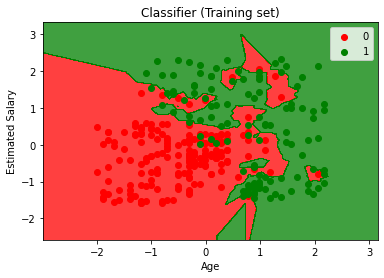

In [18]:
# Visualize the Training set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


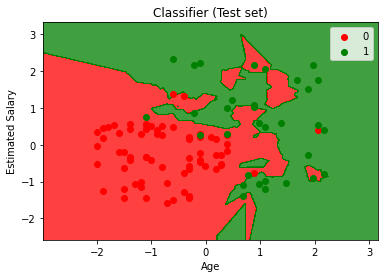

In [20]:
# Visualizing the test set

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

USING THE IRIS DATASET WITH KNN

In [24]:
# Define column names
names = [
    'sepal_length',
    'sepal_width',
    'petal_length',
    'petal_width',
    'class',
]

df = pd.read_csv('C:/Users/c2245096/OneDrive - Teesside University/DATASET FOLDER/Iris.csv', header=None, names=names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
import numpy as np

# create design matrix X and target vector y
X = df.iloc[:, [0, 3]].values 
y = np.array(df['class'])
             
# split the data into train and test
X_train, \
X_test, \
y_train, \
y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
# instantiate the learning model (k=3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

#confusion matrix for evaluation
cm = confusion_matrix(y_test, pred)
print("Confusion_Matrix:", cm, sep='\n')

# evaluate accuracy
print("Accuracy: {}".format(accuracy_score(y_test, pred)))

Confusion_Matrix:
[[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]
Accuracy: 0.96


In [74]:
# instantiate the learning model (k=3)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

#confusion matrix for evaluation
cm = confusion_matrix(y_test, pred)
print("Confusion_Matrix:", cm, sep='\n')

# evaluate accuracy
print("Accuracy: {}".format(accuracy_score(y_test, pred)))

Confusion_Matrix:
[[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]
Accuracy: 0.96


PARAMETER TUNING WITH CROSS VALIDATION

In [68]:
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

#empty list that will hold cv scores
cv_scores = []

#perform 10-fold cv
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is: 9


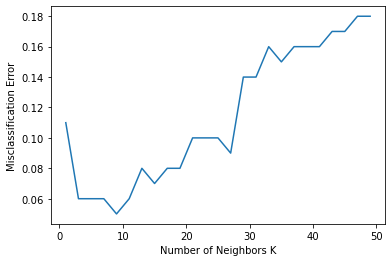

In [75]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining the best value for k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is: {}".format(optimal_k))

#plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

WRITING MY OWN KNN FROM SCRATCH

In [76]:
def train(X_train, y_train):
    # do nothing
    return

In [77]:
def predict(X_train, y_train, x_test, k):
    # create list for distances and targets
    distances = []
    targets = []
    
    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(x_test - X_train[i, :]))), i])
    
    # sort the list
        distances = sorted(distances)
        
        # make a list of the k neighbors' targets
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [81]:
def k_nearest_neighbor(X_train, y_train, X_test, k):
    # train on the input data
    train(X_train, y_train)

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

In [85]:
# making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

# evaluating accuracy
accuracy = accuracy_score(y_test, predictions)
print("The accuracy of our classifier is {}".format(100*accuracy))

TypeError: k_nearest_neighbor() missing 1 required positional argument: 'k'

In [86]:
def k_nearest_neighbor(X_train, y_train, X_test, predictions, k):
    # check if k larger than n
    assert k <= len(X_train), "[!] k can't be larger than number of samples."

    # train on the input data
    train(X_train, y_train)

# predict for each testing observation
for i in range(len(X_test)):
    predictions.append(predict(X_train, y_train, X_test[i, :], k))

NameError: name 'predictions' is not defined